# Music Information Retrieval
## Homework 3

**Note:** *This homework is based on the original one prepared by [Magdalena Fuentes](https://steinhardt.nyu.edu/people/magdalena-fuentes) at NYU and is used and modified here with permission.*

**Instructions:**

1. Complete parts 1 through 4, filling in code in the `utils.py` file where indicated **# YOUR CODE HERE** or responses in `this notebook` where marked with **# YOUR RESPONSE HERE** or **# YOUR CODE HERE**.
2. **Document** your code. Add comments explaining what the different parts of your code are doing.
3. If you copy code from external resources (e.g. librosa's examples), include references as comments.
4. When finished, commit and push this completed notebook file including the output of all cells along with the `utils.py` file to your GitHub repository corresponding to this homework.
5. IMPORTANT: do not modify any of the provided code except for paths and necessary setup changes for this notebook to run locally.

**How to work with the `utils.py` file and Google Colab:**

You can run your code locally, or remotely with Google Colab if you add the `utils.py` file to your files' folder (search for the folder icon in the menu on the left). But **CAREFUL**, you should copy any changes you make to `utils.py` in Colab to a local copy. Each time you restart a session the changes of any file in the files folder are lost.

**Grading:**

- This homework is worth 10 points.
- Each function you code in `utils.py` is worth 1 point, for a total of 6 points.
- Each answer in part 5 is worth 1 point, for a total of 4 points.
- Points will be automatically assigned when passing tests, and manually assigned otherwise.

**Academic integrity:**

Remember that this homework should be authored by you only. It's ok to discuss with classmates but you have to submit your own original solution.


## Pitch Tracking
---

For this homework, we will focus on pitch tracking, i.e. automatically figuring out the  "hums" of the tune.

We'll use deep-learning-based open source pitch tracker (CREPE). We want to see how well it works on different instruments and in various music styles, and assess the decoding of notes with and without Viterbi decoding. Happy coding and fruitful analysis!

In [1]:
# This two lines of code make your notebook aware of changes in
# your utils.py file without needing to restart the session each time
%load_ext autoreload
%autoreload 2

In [2]:
# This notebook is for visualization and written answers only
# Your code should go in utils.py
import utils as u # to use the functions from utils, do u.function()

In [3]:
# This is a file with auxiliary functions provided for you to use
import aux as a # DO NOT MODIFY THIS FILE

In [4]:
# Fix the random seed for reproducibility
from numpy.random import seed
seed(123)

## Part 1: Initialize loader and load the data using mirdata. Take a look at the dataset.





For this assignment we will use MedleyDB-pitch dataset:

<blockquote>
"Medleydb: A multitrack dataset for annotation-intensive MIR research." Bittner et al., in Proceedings of the International Society for Music Information Retrieval Conference, ISMIR, 2014.
</blockquote>

MedleyDB-Pitch is a dataset of recordings of different solo, monophonic instruments with human-lableds for pitch. This dataset is accessible to you in
[Google Drive](https://drive.google.com/file/d/1lMVfVGQa3UyZwusJHmvQ7Qrws8y5I-3O/view?usp=sharing). To use it with this Colab notebook, you should download it, upload a copy on your Google Drive under the mir_datasets folder, and unzip it.

We're also going to use [`crepe`](https://github.com/marl/crepe), which is a deep-learning pitch tracker in Python. Crepe uses a deep neural network, so if you're using Google Colab you might want to activate the `GPU runtime type` in the Runtime menu to accelerate computations.

In [5]:
import mirdata

In [6]:
# data_home = '/content/drive/MyDrive/mir_datasets/MedleyDB-Pitch' # here the location you want the data to be in your Drive
data_home = '../../datasets/MedleyDB-Pitch'
dataset_name = 'medleydb_pitch'
dataset = mirdata.initialize(dataset_name, data_home=data_home)

# Uncomment the following line and run the download code once to download the data
# dataset.download()

# Uncomment the following line and run the validate code to check the data is correct
# dataset.validate()

# Check how many tracks and load a random track
dataset.choice_track().audio

(array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00, -1.5258789e-05], dtype=float32),
 44100)

There are 103 tracks in the dataset.



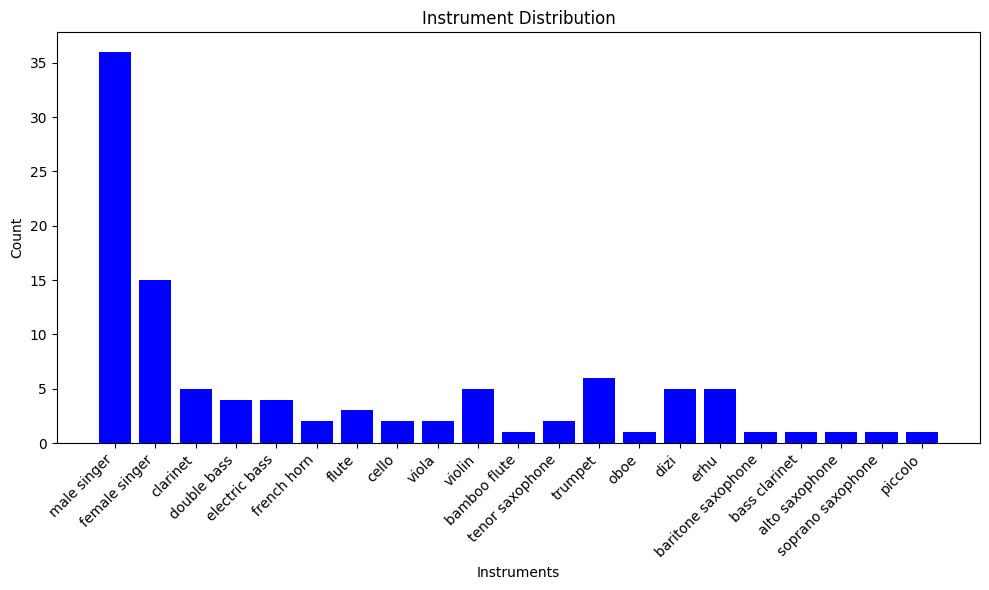

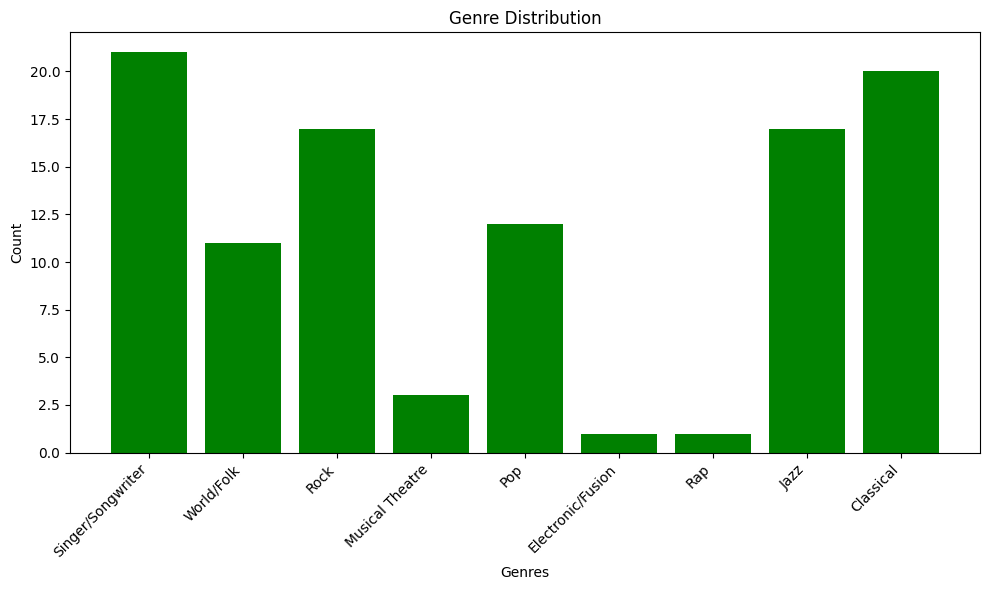

In [7]:
# Inspect dataset
stats = u.compute_dataset_stats(dataset)

print(f'There are {stats["num_tracks"]} tracks in the dataset.')
print('')
a.plot_distributions(stats)

## Part 2: Estimate Pitch

Write the code of a function called `estimate_pitch` in `utils.py` which runs the crepe pitch tracking algorithm on an audio file. See the docstring below for more details about what the function should return.

See crepe's documentation [here](https://github.com/marl/crepe).

*Hint:* Look for the section in the readme titled "using crepe inside python". Note that you can use `librosa`, instead of `scipy` to load audio.

In [8]:
# run this code to test your function
# run this to test your function
# remember this will run faster if you change runtime to GPU in Colab!
track = dataset.track("MusicDelta_Rockabilly_STEM_05")
time, frequency, confidence, activation = u.estimate_pitch(track.audio_path)

82/82 [==============================] - 15s 180ms/step


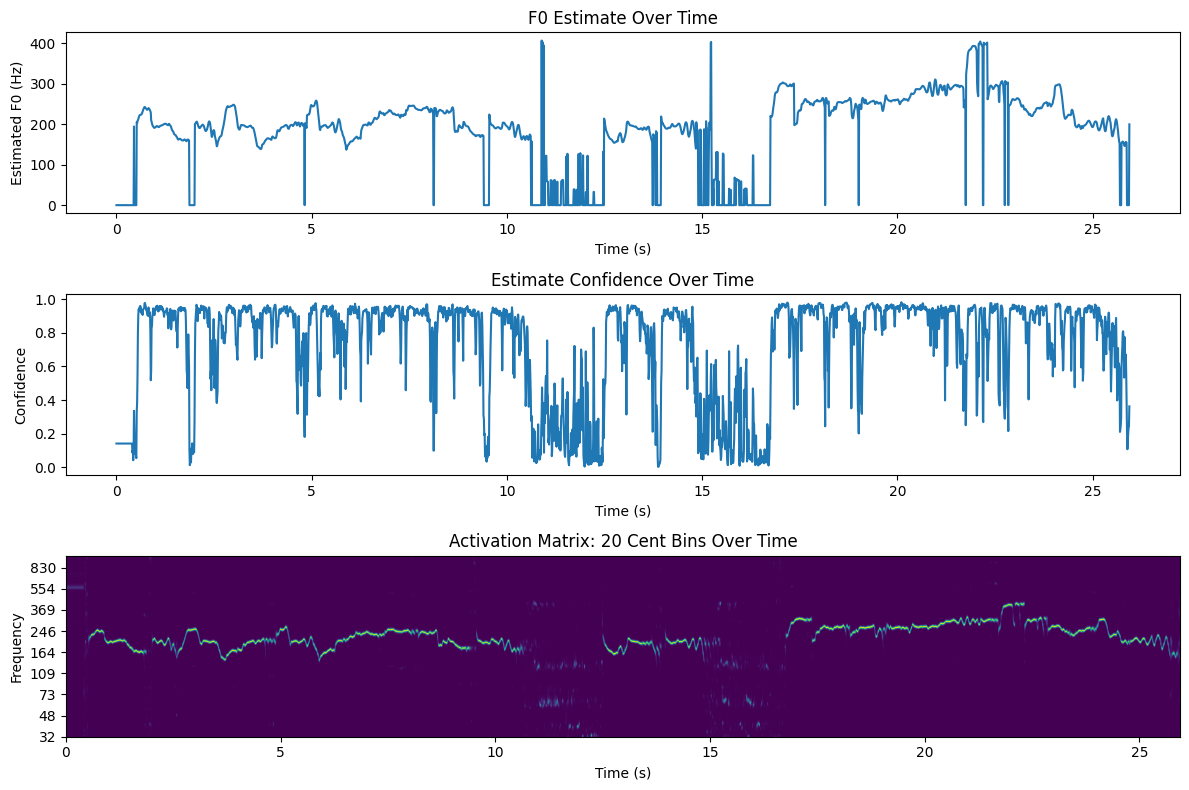

In [9]:
# Visualize pitch estimation
a.plot_pitch(time, frequency, confidence, activation)

## Part 3: Evaluate Pitch estimation

For each track, estimate the pitch with and without viterbi decoding.

Evaluate the pitch estimates for each track in MedleyDB-Pitch using `mir_eval.melody.evaluate`, which returns a dictionary with multiple scores including 'Overall Accuracy' and 'Raw Pitch Accuracy'. The keys of your dictionaries `pitch_scores` and `pitch_scores_viterbi` should be the medleydb-pitch track ids `dataset.track_ids`, and the values should be the dictionary of scores returned by mir_eval.

---

Hint: For a `dataset.track` object, you can access the ground truth pitch by calling
`example_track.pitch`, which gives a `F0Data` object with the fields `times` and `frequencies`.
You can load the audio by calling `y, fs = example_track.audio`.

In [10]:
# This loads all medleydb-pitch Track objects into a dictionary (data) which has track_ids as keys
data = dataset.load_tracks()
print("Loaded {} MedleyDB-Pitch tracks.\n".format(len(data)))

Loaded 103 MedleyDB-Pitch tracks.



In [11]:
import pickle

In [12]:
# Load scores
with open('pitch_scores.pkl', 'rb') as f:
    pitch_scores = pickle.load(f)

with open('pitch_scores_viterbi.pkl', 'rb') as f:
    pitch_scores_viterbi = pickle.load(f)

**Results for all the data**

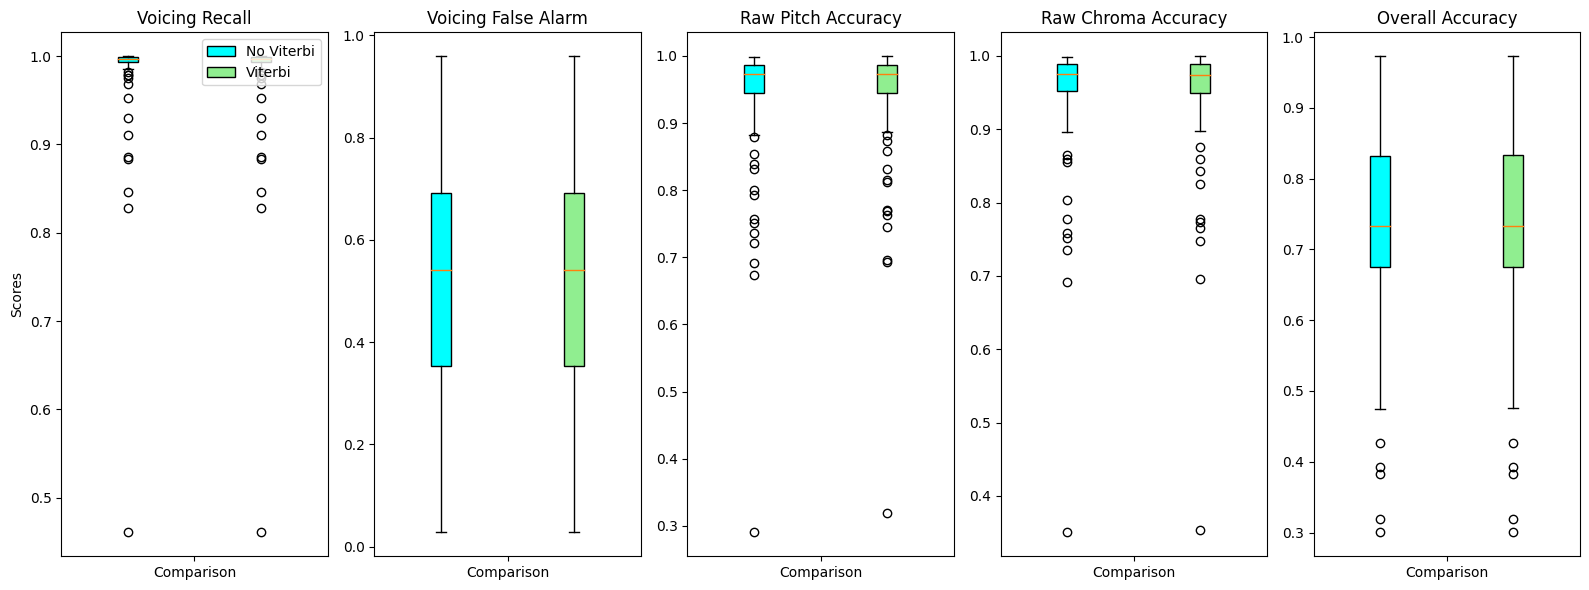

In [13]:
import matplotlib.pyplot as plt

data_for_boxplots_no_viterbi = u.prepare_boxplot_data(pitch_scores)
data_for_boxplots_viterbi = u.prepare_boxplot_data(pitch_scores_viterbi)
a.plot_comparison_boxplot(data_for_boxplots_no_viterbi, data_for_boxplots_viterbi)

## Part 4: Break down results


When you measure an algorithm's performance on a dataset, you are often computing scores per track. It's useful to look at the spread of performance across tracks, and to split the data into groups and look at the differences in performance. We are going to look at the results per genre and instrument.


In [14]:
instrument_scores = u.split_by_instrument(pitch_scores, data)
instrument_scores_viterbi = u.split_by_instrument(pitch_scores_viterbi, data)

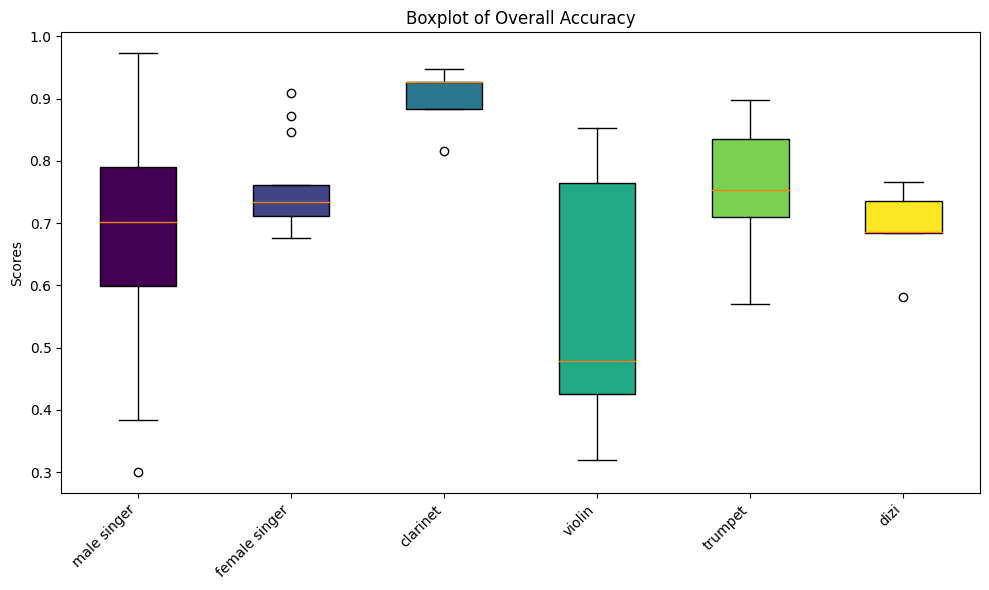

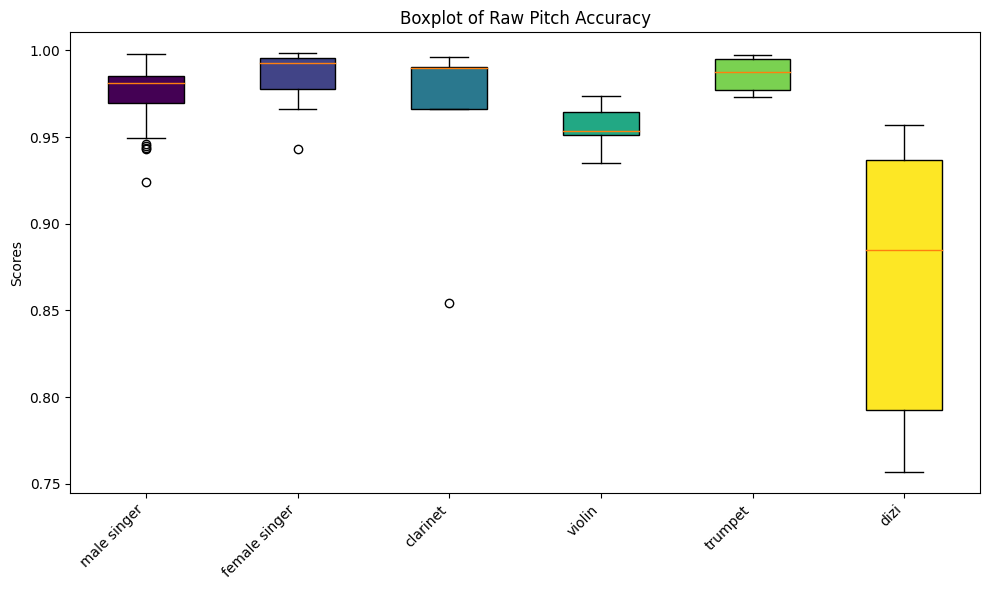

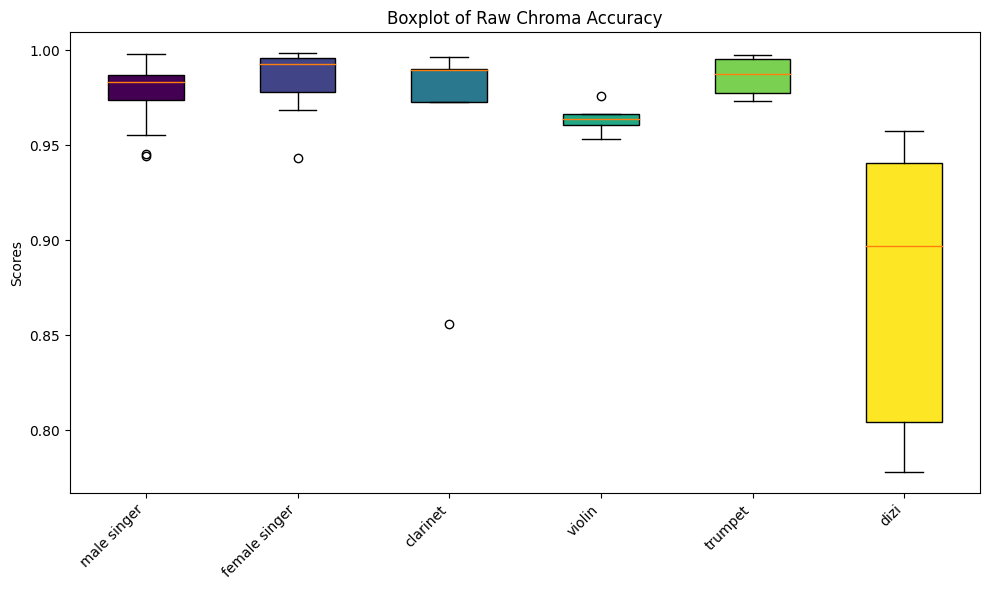

In [15]:
a.plot_per_category(instrument_scores, 'Overall Accuracy')
a.plot_per_category(instrument_scores, 'Raw Pitch Accuracy')
a.plot_per_category(instrument_scores, 'Raw Chroma Accuracy')


In [16]:
genre_scores = u.split_by_genre(pitch_scores, data)
genre_scores_viterbi = u.split_by_genre(pitch_scores_viterbi, data)

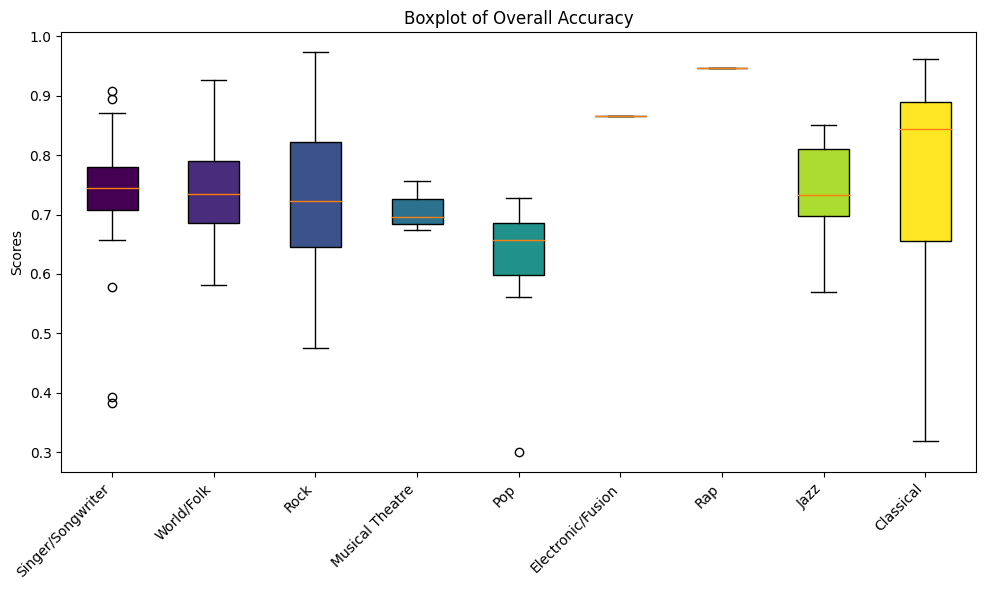

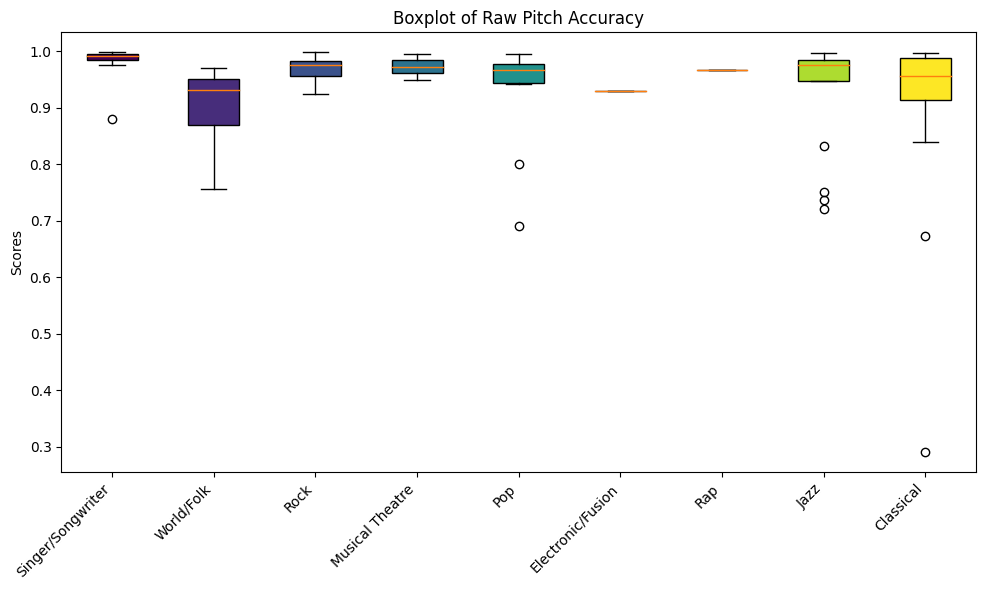

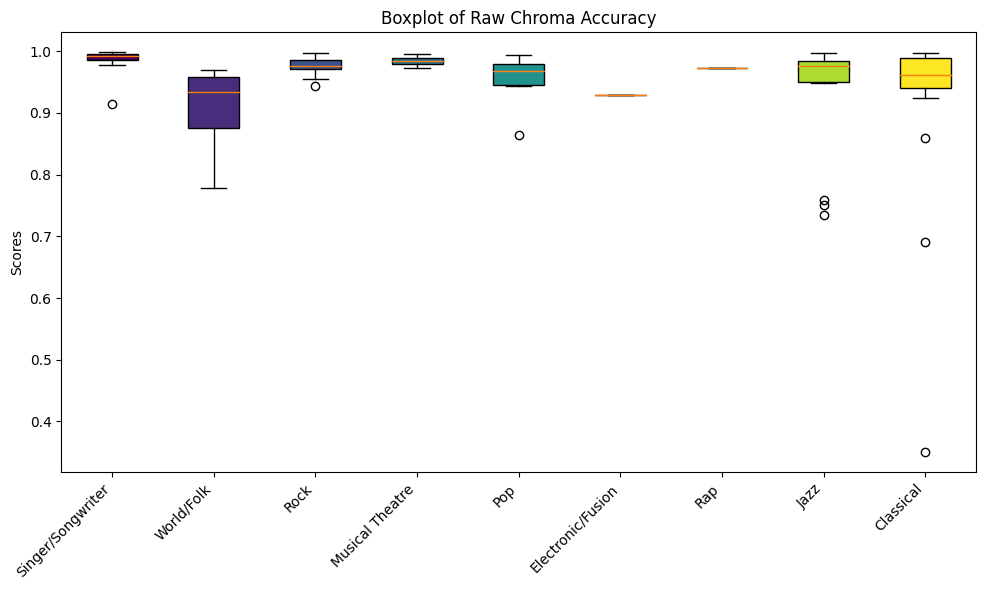

In [17]:
a.plot_per_category(genre_scores, 'Overall Accuracy')
a.plot_per_category(genre_scores, 'Raw Pitch Accuracy')
a.plot_per_category(genre_scores, 'Raw Chroma Accuracy')

## Part 4.5: Recomputation

### In the previous parts, we only saved the evaluation scores and not the actual results from Crepe Model. This was problematic as the voicing threshold had been fixed. Also, we needed to compute pitches again with crepe model for analyzing any individual sound, which would take more than 2 minutes on my PC. I rewrote the code to save Crepe predictions directly, so that I could instantly evaluate on different voicing thresholds, and get the output on any individual sound quickly.

### I also rewrote the function for plotting and sonification. Currently the sonification code has been commented for the submission, since the file size became extremely large otherwise. The following code can be run locally with sonification uncommented to generate both plots and sonifications.

In [18]:
import librosa
import crepe
import pickle
import numpy as np
from IPython.display import Audio, display
import mir_eval
from mir_eval import display as mir_display
import pandas as pd

In [19]:
def predict_crepe(audio_path, use_viterbi=False):
    """
    Estimate the fundamental frequency (pitch) of an audio file using the CREPE algorithm.

    Parameters
    ----------
    audio_path : str
        The file path to the input audio file.
    use_viterbi : bool, optional
        If True, apply Viterbi decoding to smooth the pitch track and obtain more consistent
        pitch estimates over time. Default is False.

    Returns
    -------
    time : np.ndarray
        A 1D numpy array containing time stamps for each frame in seconds.
    frequency : np.ndarray
        A 1D numpy array containing the estimated pitch for each frame in Hz. Unvoiced frames
        are set to 0 Hz.
    confidence : np.ndarray
        A 1D numpy array containing the confidence of the pitch estimate for each frame.
    activation : np.ndarray
        A 2D numpy array representing the activation matrix returned by the CREPE algorithm,
        which can be used to visualize the pitch estimation process.

    """
    # YOUR CODE HERE

    # Load the audio file using librosa
    y, sr = librosa.load(audio_path, sr=16000, mono=True)

    # Use the CREPE algorithm to estimate pitch
    time, frequency, confidence, _ = crepe.predict(y, sr, viterbi=use_viterbi)

    # Return the time, frequency, confidence
    return time, frequency, confidence

In [20]:
# Load the dictionaries without Viterbi
with open('time.pkl', 'rb') as f:
    time = pickle.load(f)
    
with open('frequency.pkl', 'rb') as f:
    frequency = pickle.load(f)
    
with open('confidence.pkl', 'rb') as f:
    confidence = pickle.load(f)    

In [21]:
# Load the dictionaries with Viterbi
with open('time_viterbi.pkl', 'rb') as f:
    time_viterbi = pickle.load(f)
    
with open('frequency_viterbi.pkl', 'rb') as f:
    frequency_viterbi = pickle.load(f)
    
with open('confidence_viterbi.pkl', 'rb') as f:
    confidence_viterbi = pickle.load(f)   

In [22]:
est = {
        'time': time, 
        'freq': frequency, 
        'conf': confidence, 
        'time_vit': time_viterbi, 
        'freq_vit': frequency_viterbi,
        'conf_vit': confidence_viterbi
}

In [23]:
def plot_and_sonify_outputs(track_id, data, est, voicing_threshold=0.3, viterbi=False, get_reference=False):
    """
    Plot reference and estimated pitches for a track and directly play the sonified pitch contours
    mixed with the original audio.

    Parameters:
    - track_id (str): The identifier for the track in the dataset.
    - data (dict): The dataset containing pitch and audio path information.
    - viterbi (bool): Whether to use Viterbi decoding in pitch estimation.

    This function creates a plot and plays audio for the specified track.
    The plot displays the reference pitch (in black) against the estimated pitch (in red).
    The audio streams contain the original audio mixed with the sonified estimated pitch
    and the sonified reference pitch, respectively.
    """

    # Estimate the pitch using the provided data and settings
    if viterbi:
        time, freq, conf = est['time_vit'][track_id], est['freq_vit'][track_id].copy(), est['conf_vit'][track_id]
    else:
        time, freq, conf = est['time'][track_id], est['freq'][track_id].copy(), est['conf'][track_id]
        
    freq[conf<voicing_threshold] = 0
    time_ref = data[track_id].pitch.times
    freq_ref = data[track_id].pitch.frequencies
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(16, 7))
    mir_display.pitch(time_ref, freq_ref, color="k", linewidth=2.1, label="Reference", ax=ax)
    mir_display.pitch(time, freq, color="r", linewidth=0.8, label="Estimate", ax=ax)
    ax.legend()
    ax.set_title(f"Pitch Comparison for {track_id}" + (" with Viterbi" if viterbi else ""))
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Frequency (Hz)")
    plt.show()

    # Print the evaluation metrics
    scores = mir_eval.melody.evaluate(time_ref, freq_ref, time, freq)
    for key, val in scores.items():
        print(f"{key} : {val}")
    
    # Sonify the estimated pitch contour
    son_est = mir_eval.sonify.pitch_contour(time, freq, fs=44100)
    
    # Sonify the reference pitch contour
    son_ref = mir_eval.sonify.pitch_contour(time_ref, freq_ref, fs=44100)
    
    # Load the original audio
    original_audio, sr = librosa.load(data[track_id].audio_path, sr=None)

    # Trim or pad the original audio to match the sonification length
    min_len = min(original_audio.shape[0], son_est.shape[0], son_ref.shape[0])
#     mixed_est = original_audio[:min_len] + son_est[:min_len]
#     mixed_ref = original_audio[:min_len] + son_ref[:min_len]
    original = original_audio[:min_len]
    mixed_est = son_est[:min_len]
    mixed_ref = son_ref[:min_len]

    # Normalize the mixed audio
    original /= np.max(np.abs(original))
    mixed_est /= np.max(np.abs(mixed_est))
    mixed_ref /= np.max(np.abs(mixed_ref))

    ##########################################
    # I have commented the following lines to remove audio files from the notebook.
    # These can be uncommented to generate audio files locally
    # Play the mixed audio
#     print("Original Audio")
#     display(Audio(original, rate=sr))
#     print("Estimated Pitch")
#     display(Audio(mixed_est, rate=sr))
#     if get_reference:
#         print("Reference Pitch")
#         display(Audio(mixed_ref, rate=sr))
    ##########################################

## Part 5: Analysis


Using the plots from previous parts, identify different trends as indicated below. For each trend, write a short paragraph discussing what is happening and why. You can support your observation with further figures or breakdown of results.

#### Trend 1 - Performance with different instruments


`# YOUR RESPONSE HERE`

- The median raw pitch accuracy and raw chroma accuracy seem great for almost all instruments.
- Since the median overall accuracy is low, the first guess is that the voicing detection is problematic and is bringing the overall scores down. 
- This seems to be corroborated by the high values of voicing false alarm too.
- But as I investigate further, the low voicing accuracy predominantly seems to be not because of model issues but due to incomplete ground truth annotations or subjective decisions about when should ground truth pitch end given a long tail of sound

In [24]:
for inst, val in instrument_scores.items():
    print(f'{inst} : {len(val)}')

male singer : 36
female singer : 15
clarinet : 5
violin : 5
trumpet : 6
dizi : 5


In [25]:
def get_lowest_and_highest_score_track(scores, category):
    """
    Get the track ids with lowest and highest scores for the given category
    """
    values = scores[category]
    best = max(values, key= lambda x: values[x]['Overall Accuracy'])
    worst = min(values, key= lambda x: values[x]['Overall Accuracy'])
    
    return best, worst

#### Violin

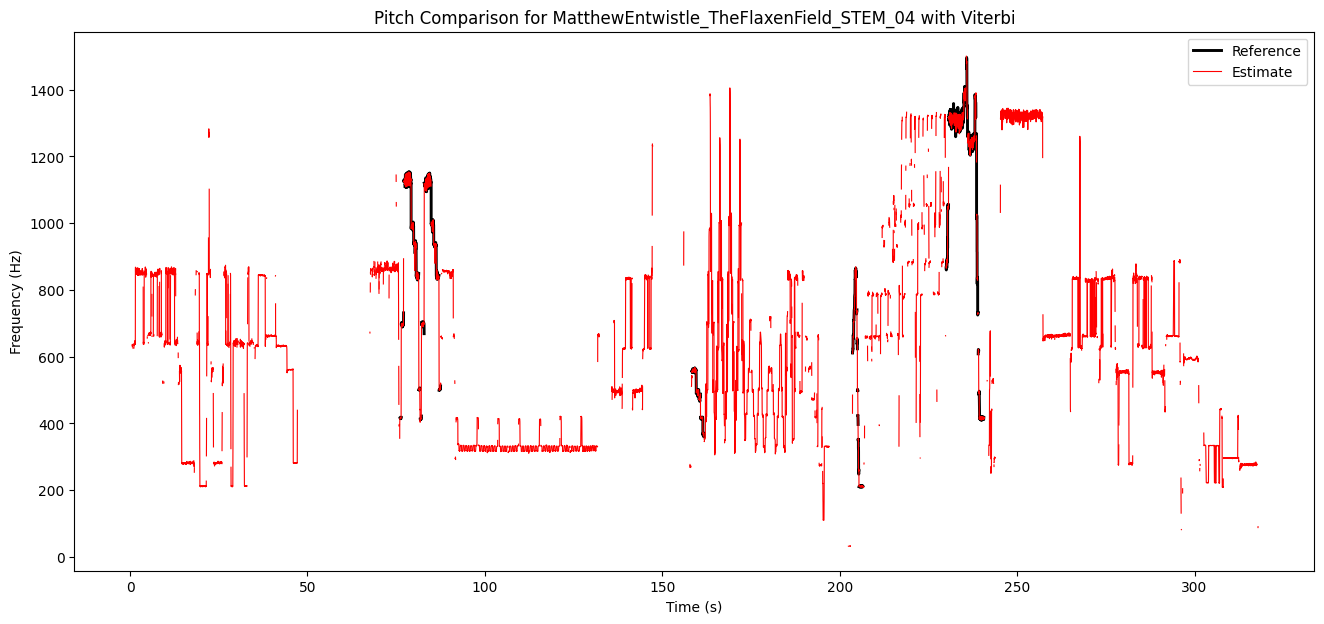

Voicing Recall : 0.9945781826068099
Voicing False Alarm : 0.7402632968838637
Raw Pitch Accuracy : 0.9741921492084147
Raw Chroma Accuracy : 0.9741921492084147
Overall Accuracy : 0.3188473408454748


In [26]:
best_violin, worst_violin = get_lowest_and_highest_score_track(instrument_scores, 'violin')
plot_and_sonify_outputs(worst_violin, data, est, voicing_threshold=0.3, viterbi=True)

##### This is clearly the case where lots of reference annotations are missing, that bring down the overall accuracy of this track. The estimated pitch output actually matches the input audio reasonably well, which is demonstrated by the raw pitch and chroma accuracies.

#### Dizi

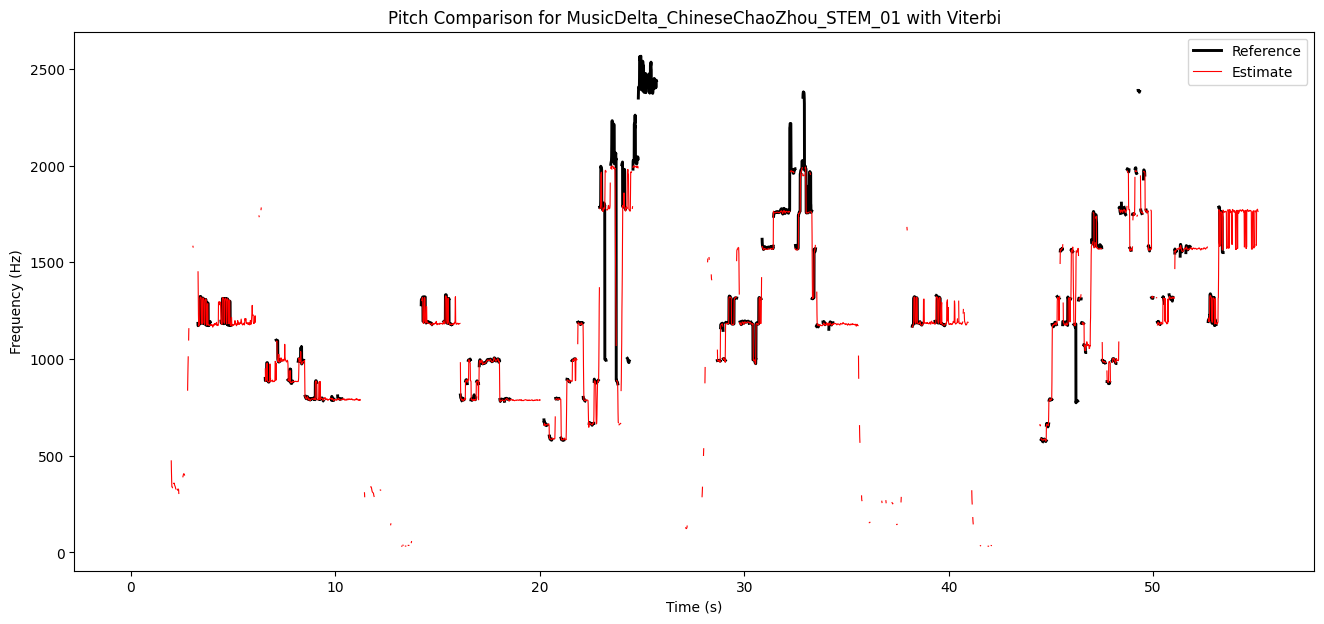

Voicing Recall : 0.9297658862876255
Voicing False Alarm : 0.5416261742792355
Raw Pitch Accuracy : 0.8154960981047937
Raw Chroma Accuracy : 0.8246934225195095
Overall Accuracy : 0.5896332718705183


In [27]:
best_dizi, worst_dizi = get_lowest_and_highest_score_track(instrument_scores, 'dizi')
plot_and_sonify_outputs(worst_dizi, data, est, voicing_threshold=0.3, viterbi=True, get_reference=True)

##### This is a nice example where raw pitch and raw chroma accuracies are slightly low too. For the `dizi` instrument, model seems to be having trouble with detecting pitch for very short almost percussive sounding notes.

#### Clarinet

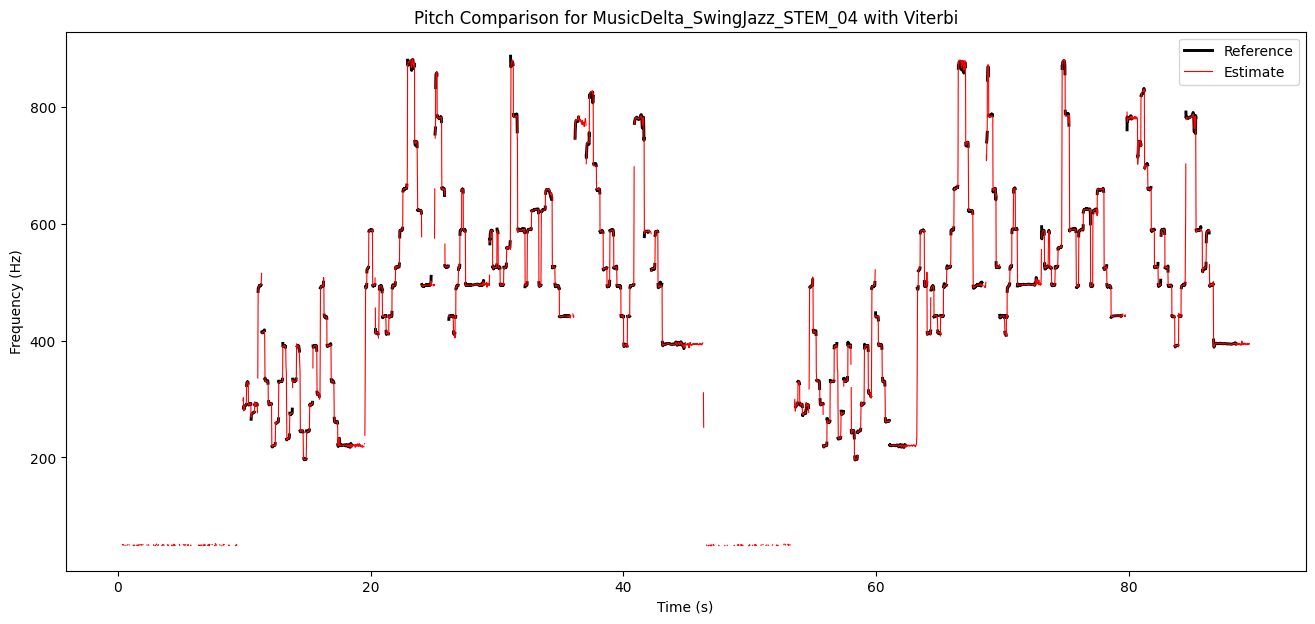

Voicing Recall : 0.9989092711948439
Voicing False Alarm : 0.5252108716026241
Raw Pitch Accuracy : 0.9923648983639068
Raw Chroma Accuracy : 0.9923648983639068
Overall Accuracy : 0.8132944228274968


In [28]:
best_clarinet, worst_clarinet = get_lowest_and_highest_score_track(instrument_scores, 'clarinet')
plot_and_sonify_outputs(worst_clarinet, data, est, voicing_threshold=0.3, viterbi=True)

##### There is a clear low frequency hum in the audio at the beginning and in the silences, that the crepe model captures leading to lower overall accuracy. The pitch estimation is extremely good though as indicated by the raw pitch and raw chroma accuracies.

#### Trumpet

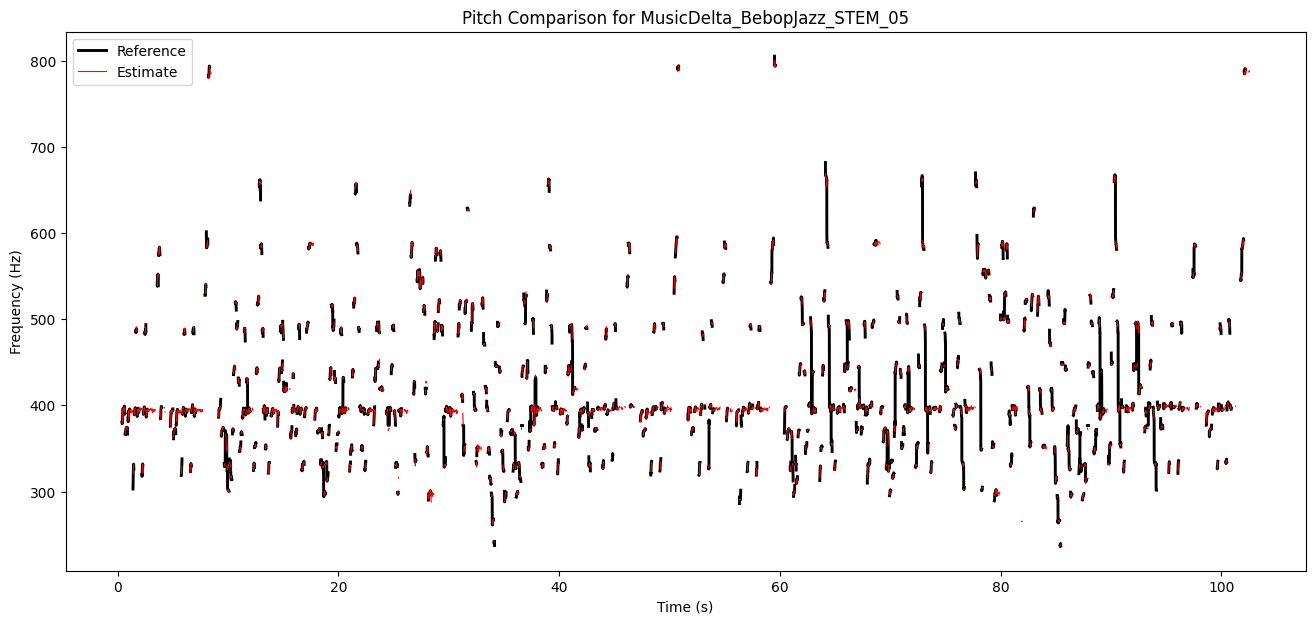

Voicing Recall : 0.8305694305694306
Voicing False Alarm : 0.3256114921703119
Raw Pitch Accuracy : 0.8287712287712288
Raw Chroma Accuracy : 0.8287712287712288
Overall Accuracy : 0.7615154761233579


In [29]:
best_trumpet, worst_trumpet = get_lowest_and_highest_score_track(instrument_scores, 'trumpet')
plot_and_sonify_outputs(worst_trumpet, data, est, voicing_threshold=0.9, viterbi=False)

##### Except for some very fast trills, crepe does a great job at detecting pitches in this trumpet example. The overall accuracy was `0.56` with voicing threshold `0.3`, but I could clearly see that the pitch and chroma accuracy were high, just the reference marked were very short and percussive like, but the trumpet audio had longer tails. So I adjusted the voicing threshold to only keep the crepe predictions very short just like the reference, and was able to get overall accuracy at `0.76` with a voicing threshold of `0.9`. This example again shows the difficulty of setting a good voicing threshold, one can change the value depending upon the kind of detection one intends from crepe.

#### Trend 2 - Performance with different genres


`# YOUR RESPONSE HERE`

- Again the raw pitch and chroma accuracies seem great, but the overall accuracies are low
- It seems to reflect the similar problem of voicing detection, and I suspect I'll find similar cases of incomplete ground truths in the worst overall accuracy cases

In [30]:
for inst, val in genre_scores.items():
    print(f'{inst} : {len(val)}')

Singer/Songwriter : 21
World/Folk : 11
Rock : 17
Musical Theatre : 3
Pop : 12
Electronic/Fusion : 1
Rap : 1
Jazz : 17
Classical : 20


##### `Singer/Songwriter`, `Rock`, `Pop` and `Classical` seem to have their lowest overall scores below 0.5, so I investigate the worst cases in all of them

#### Classical

In [31]:
best, worst = get_lowest_and_highest_score_track(genre_scores, 'Classical')
print(worst)

MatthewEntwistle_TheFlaxenField_STEM_04


##### This is the same as worst violin case, so analysis remains the same

#### Singer/Songwriter

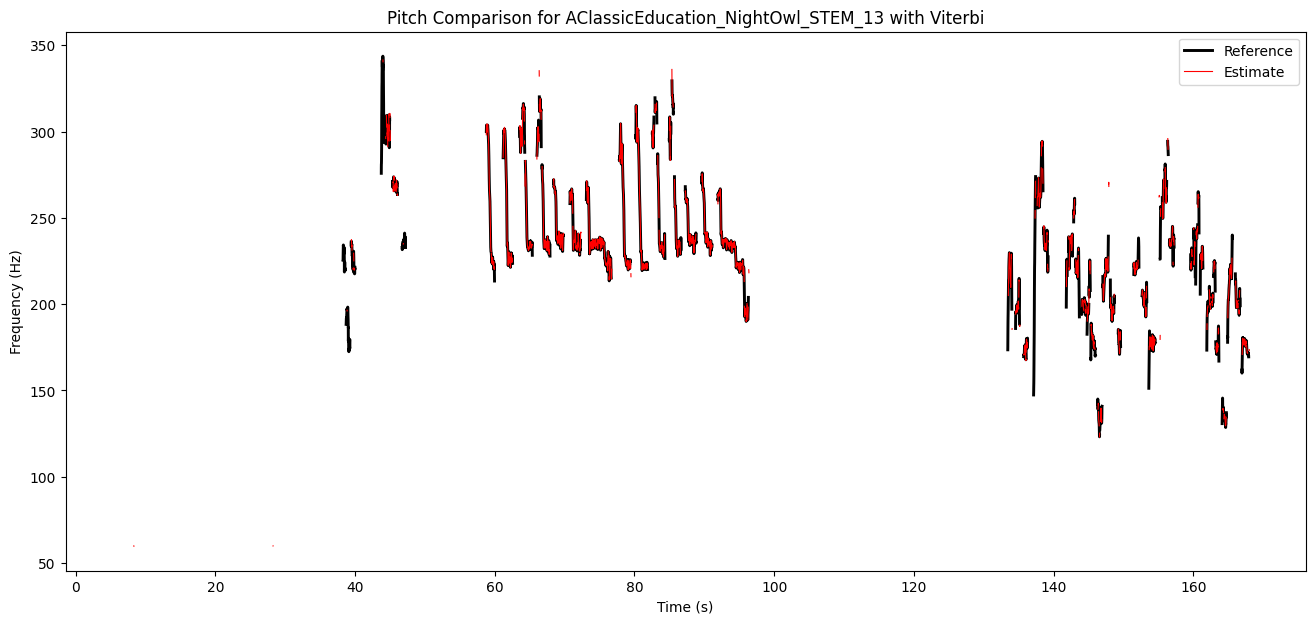

Voicing Recall : 0.8689320388349514
Voicing False Alarm : 0.009016624401239785
Raw Pitch Accuracy : 0.8685679611650485
Raw Chroma Accuracy : 0.8685679611650485
Overall Accuracy : 0.9568294169431841


In [32]:
best, worst = get_lowest_and_highest_score_track(genre_scores, 'Singer/Songwriter')
plot_and_sonify_outputs(worst, data, est, voicing_threshold=0.9, viterbi=True)

##### Low frequency noise in the audio again at the beginning and in the silences,  leading to lower overall accuracy of `0.38` with a voicing threshold of `0.3`. Simply adjusting the voicing threshold to `0.9` to eliminate the misdetections, leads to a very high overall accuracy of `0.95`.

#### Rock

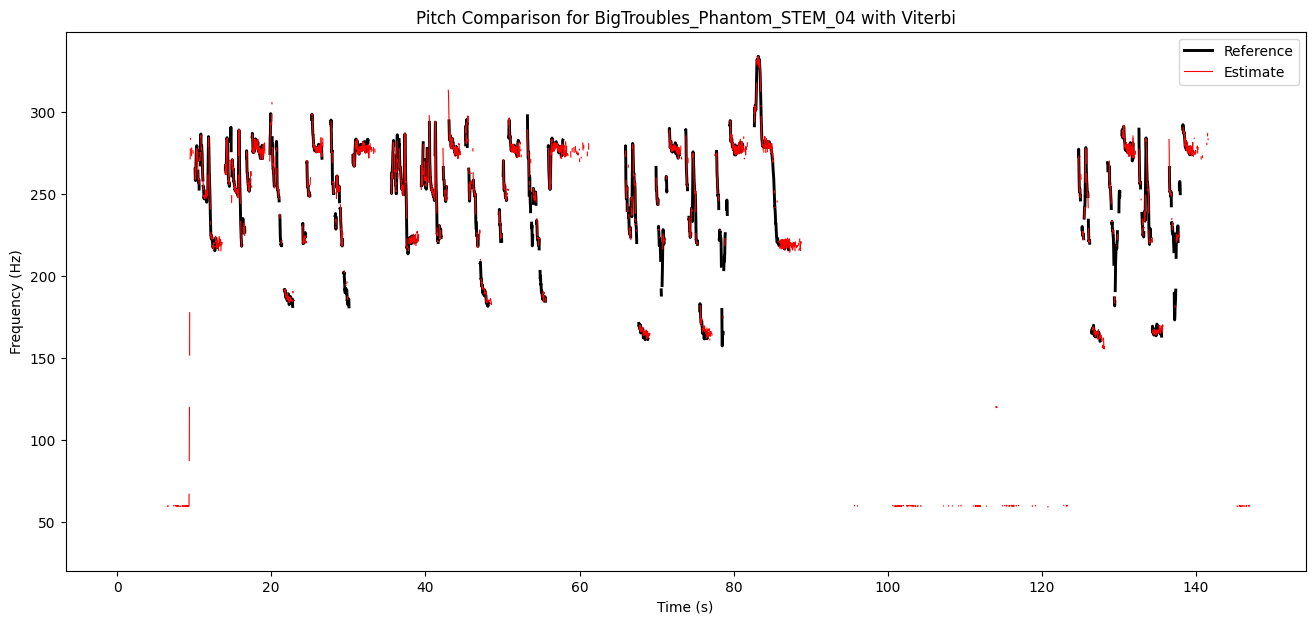

Voicing Recall : 0.7967702955069758
Voicing False Alarm : 0.16416805478437904
Raw Pitch Accuracy : 0.7954520487751291
Raw Chroma Accuracy : 0.7954520487751291
Overall Accuracy : 0.8213100505689002


In [33]:
best, worst = get_lowest_and_highest_score_track(genre_scores, 'Rock')
plot_and_sonify_outputs(worst, data, est, voicing_threshold=0.85, viterbi=True)

##### Low frequency hum again. Setting the voicing threshold to `0.85` improves the overall accuracy a lot.

#### Pop

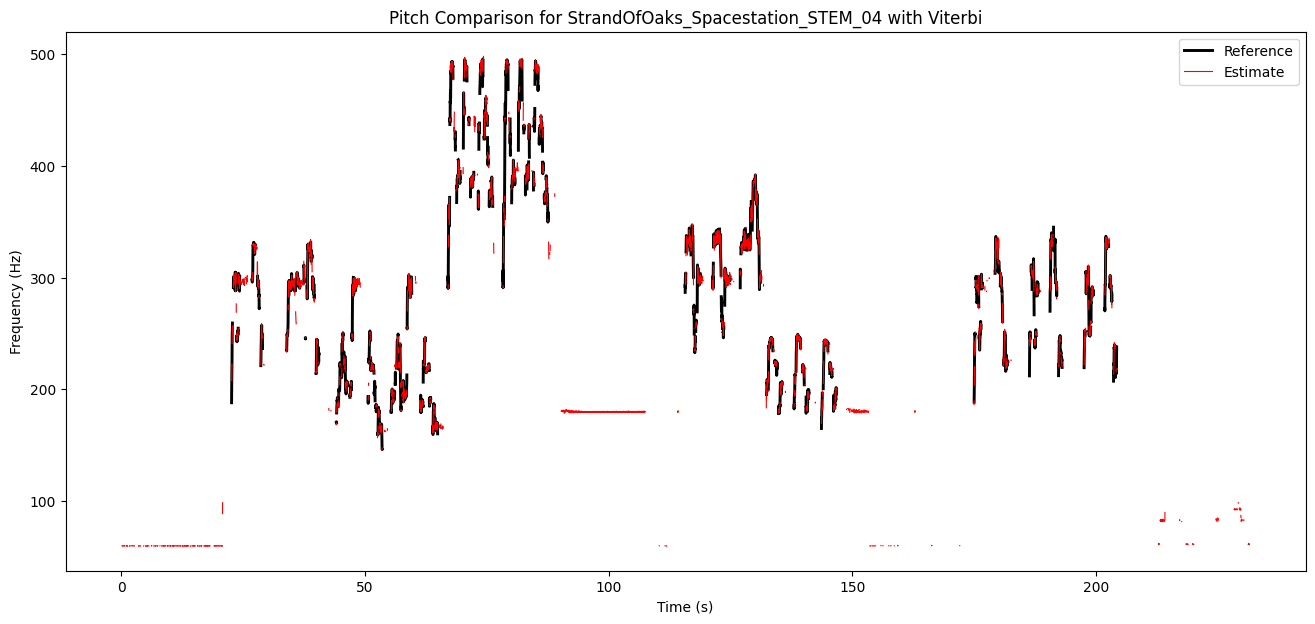

Voicing Recall : 0.8375
Voicing False Alarm : 0.2
Raw Pitch Accuracy : 0.8346739130434783
Raw Chroma Accuracy : 0.8346739130434783
Overall Accuracy : 0.807593430135682


In [34]:
best, worst = get_lowest_and_highest_score_track(genre_scores, 'Pop')
plot_and_sonify_outputs(worst, data, est, voicing_threshold=0.85, viterbi=True)

##### Low frequency hum again. Setting the voicing threshold to `0.85` improves the overall accuracy a lot.

#### Trend 3 - Performance with different voicing thresholds

We used a default voicing threshold of 0.3. How would you find the best threshold? If you compute the scores without Viterbi using this threshold, does the performance improve?

`# YOUR RESPONSE HERE`

- As I observed in the previous case analysis, changing the voicing thresholds did improve the overall accuracy for some tracks since it lowered the voicing false alarm.
- I'll evaluate the average of all metrics for all tracks in the dataset at different voicing thresholds
- Trends can be observed for all metrics, but I'll pick the one for voicing threshold

In [35]:
def evaluate_pitch_estimations(data, est, voicing_threshold=0.3, viterbi=False):
    # YOUR CODE HERE
    evaluation_scores = {}
    
    # Loop through the tracks in the input data
    for track_id, track in data.items():

        # Estimate the pitch using the provided data and settings
        if viterbi:
            time, freq, conf = est['time_vit'][track_id], est['freq_vit'][track_id].copy(), est['conf_vit'][track_id]
        else:
            time, freq, conf = est['time'][track_id], est['freq'][track_id].copy(), est['conf'][track_id]

        freq[conf<voicing_threshold] = 0
        time_ref = track.pitch.times
        freq_ref = track.pitch.frequencies

        # Evaluate the estimated pitch using mir_eval
        scores = mir_eval.melody.evaluate(time_ref, freq_ref, time, freq)

        # Store the evaluation scores in the dictionary
        for score, val in scores.items():
            if score in evaluation_scores:
                evaluation_scores[score]+=val
            else:
                evaluation_scores[score] = val

    # Return the evaluation scores
    total_tracks = len(data.items())
    for score, val in scores.items():
        evaluation_scores[score]/=total_tracks
    return evaluation_scores

In [36]:
all_evaluations = {}
for threshold in np.arange(0,1,0.1):
    all_evaluations[threshold] = evaluate_pitch_estimations(data, est, voicing_threshold=threshold, viterbi=False)

In [37]:
df = pd.DataFrame(all_evaluations).transpose()
df

,Voicing Recall,Voicing False Alarm,Raw Pitch Accuracy,Raw Chroma Accuracy,Overall Accuracy
0.0,0.999999,0.999814,0.943308,0.956157,0.469322
0.1,0.992226,0.807668,0.943134,0.953624,0.578960
0.2,0.988204,0.574532,0.942604,0.952747,0.707357
0.3,0.983325,0.521059,0.941102,0.950996,0.730996
0.4,0.974873,0.470408,0.937232,0.946653,0.752079
0.5,0.961347,0.418171,0.929176,0.938092,0.771804
0.6,0.941907,0.362330,0.915712,0.923950,0.790441
0.7,0.911344,0.295833,0.891639,0.898863,0.808900
0.8,0.854053,0.210967,0.841422,0.846713,0.822794
0.9,0.673165,0.096188,0.668828,0.670439,0.786743


<Axes: xlabel='Voicing Thresholds', ylabel='Average Overall Accuracy'>

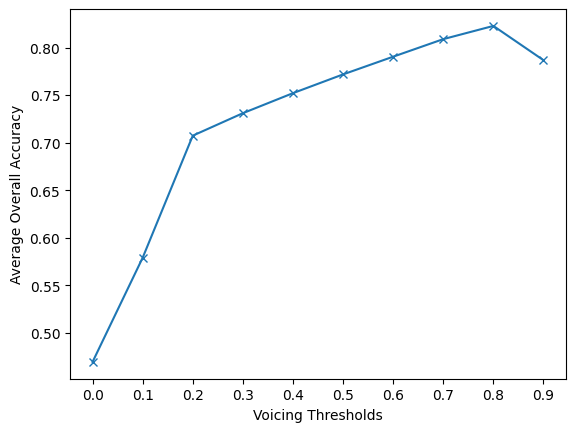

In [38]:
df['Overall Accuracy'].plot(xlabel="Voicing Thresholds", ylabel="Average Overall Accuracy", xticks=df.index, marker='x')

##### Based on this analysis, values between `0.7` and `0.8` seem to be good thresholds, based on the tradeoff between voicing recall and overall accuracy. Setting the voicing threshold around these values could lead to better overall accuracies and good enough voicing recall. 

#### Trend 4 - Comment on the best/worst tracks using the sonification provided in `aux.py`. What trends did you find?


`# YOUR RESPONSE HERE`

- The best performing track is clearly improved by using viterbi. The occasional mispredictions get smoothed out.
- The worst performing track has a terrible overall accuracy not because of wrong predictions, but because the low frequency hum in the signal is unaccounted for in the ground truth annotation, which crepe detects and leads to very low overall accuracy.
- This can be partially corrected by setting a higher voicing threshold.
- I demonstrate this by setting a higher voicing threshold of 0.85 with viterbi to improve the overall accuracy from `0.3` to `0.8`

In [39]:
# run this and the cells below
best_track_oa, value = max(pitch_scores.items(), key=lambda x: x[1]['Overall Accuracy'])
print(f"File with max Overall Accuracy: {best_track_oa}, Accuracy: {value['Overall Accuracy']}")

worst_track_oa, value = min(pitch_scores.items(), key=lambda x: x[1]['Overall Accuracy'])
print(f"File with min Overall Accuracy: {worst_track_oa}, Accuracy: {value['Overall Accuracy']}")


best_track_oa_vit, value = max(pitch_scores_viterbi.items(), key=lambda x: x[1]['Overall Accuracy'])
print(f"File with max Overall Accuracy with Viterbi: {best_track_oa_vit}, Accuracy: {value['Overall Accuracy']}")

worst_track_oa_vit, value = min(pitch_scores_viterbi.items(), key=lambda x: x[1]['Overall Accuracy'])
print(f"File with min Overall Accuracy with Viterbi: {worst_track_oa_vit}, Accuracy: {value['Overall Accuracy']}")

File with max Overall Accuracy: Creepoid_OldTree_STEM_07, Accuracy: 0.9730124277290102
File with min Overall Accuracy: StrandOfOaks_Spacestation_STEM_04, Accuracy: 0.3000714115686741
File with max Overall Accuracy with Viterbi: Creepoid_OldTree_STEM_07, Accuracy: 0.9732237183304201
File with min Overall Accuracy with Viterbi: StrandOfOaks_Spacestation_STEM_04, Accuracy: 0.3001904308497977


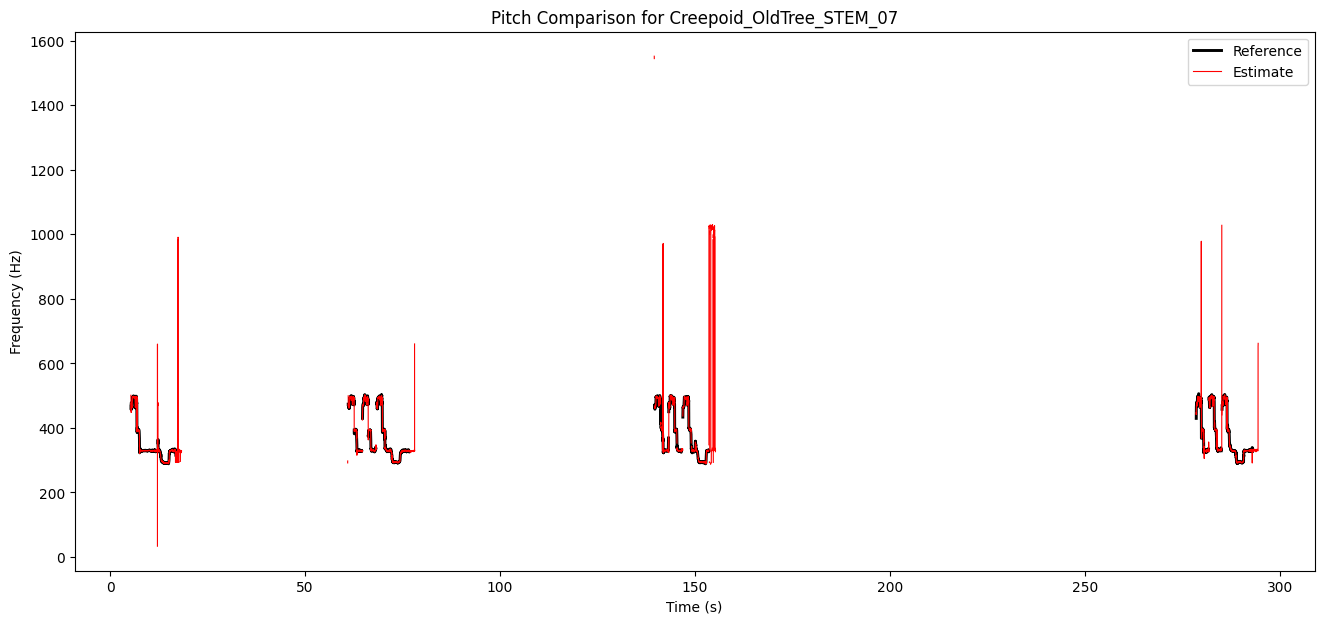

Voicing Recall : 0.9977392614920875
Voicing False Alarm : 0.02779855980548022
Raw Pitch Accuracy : 0.9765313812035741
Raw Chroma Accuracy : 0.9765313812035741
Overall Accuracy : 0.9729740112560266


In [40]:
plot_and_sonify_outputs(best_track_oa, data, est)

##### This audio seems to be free of any noise hum. The raw pitch accuracy and chroma accuracy are not exceptionally high, but the low voicing false alarm rate leads to high overall accuracy.

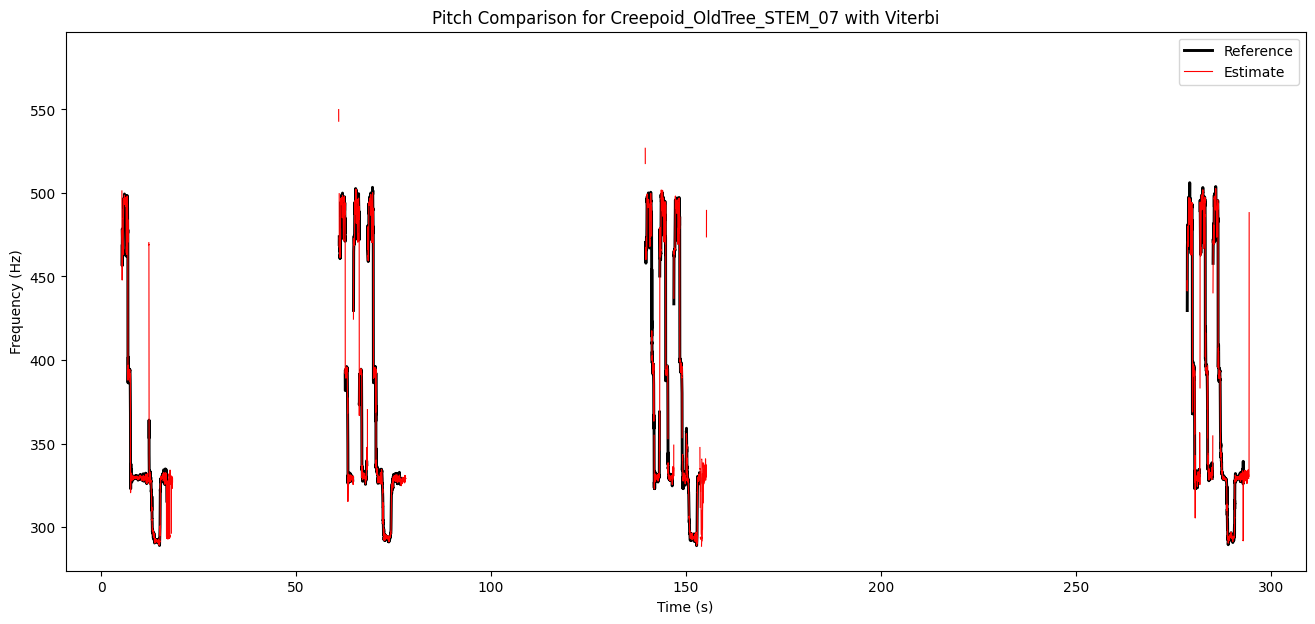

Voicing Recall : 0.9977392614920875
Voicing False Alarm : 0.02779855980548022
Raw Pitch Accuracy : 0.9777155775648617
Raw Chroma Accuracy : 0.9777155775648617
Overall Accuracy : 0.9731853018574365


In [41]:
plot_and_sonify_outputs(best_track_oa_vit, data, est, viterbi=True)

##### Clearly using viterbi has improved the exceptionally high mispredictions. There's a miniscule improvement in overall accuracy as well.

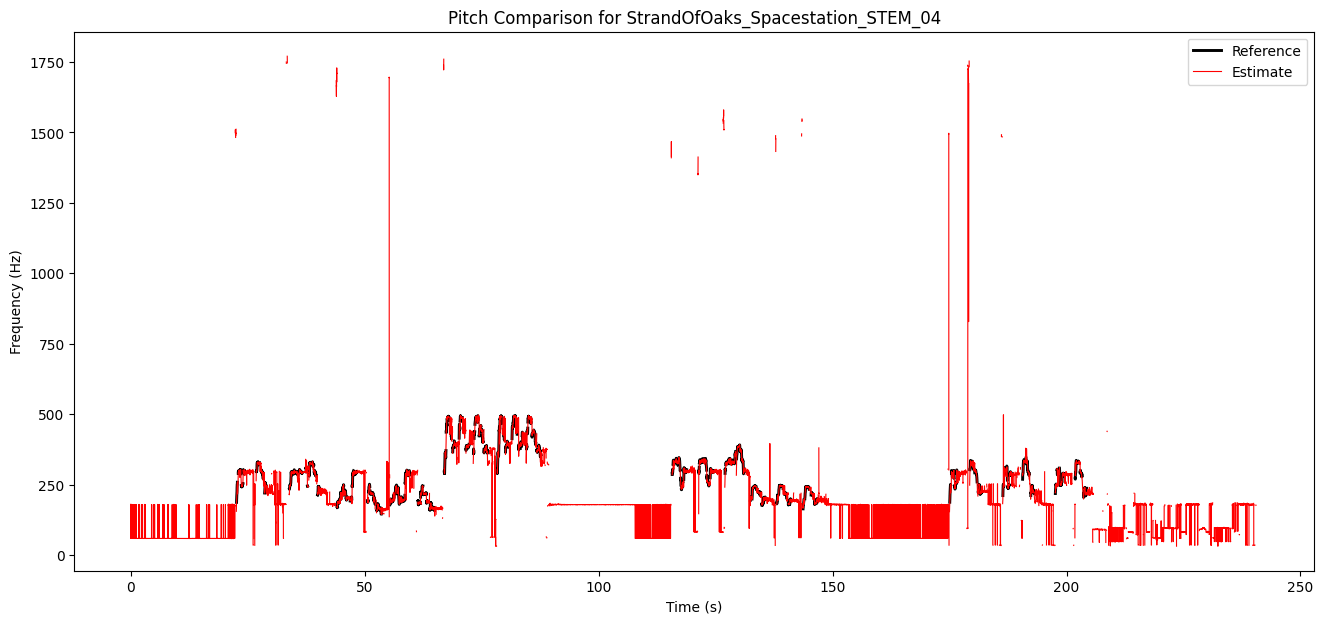

Voicing Recall : 0.9998913043478261
Voicing False Alarm : 0.8894239561109418
Raw Pitch Accuracy : 0.9784782608695652
Raw Chroma Accuracy : 0.9788043478260869
Overall Accuracy : 0.30064270411806715


In [42]:
plot_and_sonify_outputs(worst_track_oa, data, est)

##### Low frequency hum in the signal leads to these loads of low frequency predictions not accounted for in ground truth. We solve this in next cell with a higher voicing threshold

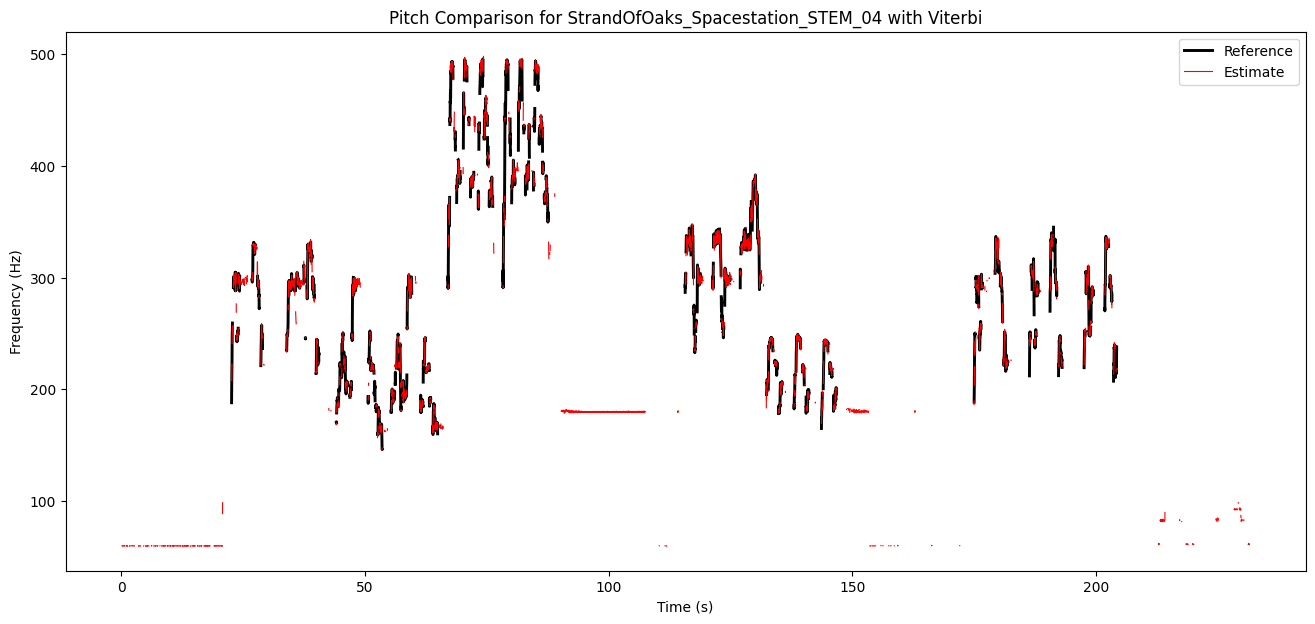

Voicing Recall : 0.8375
Voicing False Alarm : 0.2
Raw Pitch Accuracy : 0.8346739130434783
Raw Chroma Accuracy : 0.8346739130434783
Overall Accuracy : 0.807593430135682


In [43]:
plot_and_sonify_outputs(worst_track_oa_vit, data, est, voicing_threshold=0.85, viterbi=True)

##### Setting a voicing threshold of `0.85` and using viterbi, improves the overall accuracy by a huge margin

## Part 7: References

1. mirdata - https://mirdata.readthedocs.io/en/latest/
2. Librosa - https://librosa.org/doc/latest/index.html
3. mir-eval - https://craffel.github.io/mir_eval/
4. crepe - https://github.com/marl/crepe
5. ISMIR 2018 Tutorial - https://ismir2018.ismir.net/pages/events-tutorial-06.html